In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/IT Salary Survey EU  2020.csv')

In [ ]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [ ]:
df.tail()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",65000.0,6500,40000.0,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


In [ ]:
df.shape

(1253, 23)

In [ ]:
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                          880
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    791
Annual bonus+stocks one year ago. Only answer if staying in same country                                                   639
Yearly bonus + stocks in EUR                                                                                               424
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                   368
Other technologies/programming languages you use often                                                                     157
Your main technology / programming language                                                                                127
Number of vacation days                                                                                        

In [ ]:
df=df.dropna()
df.isnull().sum().sort_values(ascending=False)

Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    0
Yearly brutto salary (without bonus and stocks) in EUR                                                                     0
Age                                                                                                                        0
Gender                                                                                                                     0
City                                                                                                                       0
Position                                                                                                                   0
Total years of experience                                                                                                  0
Years of experience in Germany                                                                                             0


In [ ]:
df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

In [ ]:
df.rename(columns = {'Your main technology / programming language': 'Main technology', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work','Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

In [ ]:
df['Vacation days'] = pd.to_numeric(df['Vacation days'], errors = 'coerce').fillna(0).astype(int)
df['Years of experience'] = pd.to_numeric(df['Years of experience'], errors = 'coerce').fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly salary'] = df['Yearly salary'].astype(int)

In [ ]:
# the distribution of programing languages:

# We noticed that there are many repeated values in different forms (for example we have :javascript, Javascript, JavaScript, Js, js)
# so we will unify them:

df = df.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')
df = df.replace(['typescript', 'Typescript'], 'TypeScript')

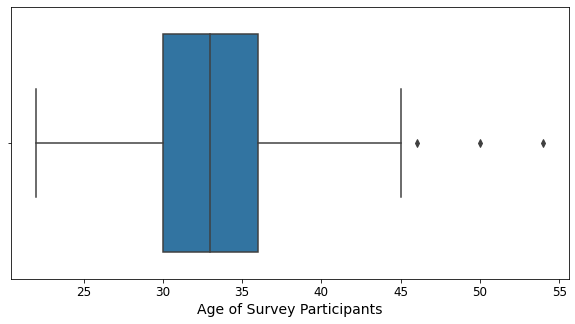

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Age')
plt.xlabel("Age of Survey Participants",fontsize=14)
plt.xticks(fontsize=12)
plt.show()

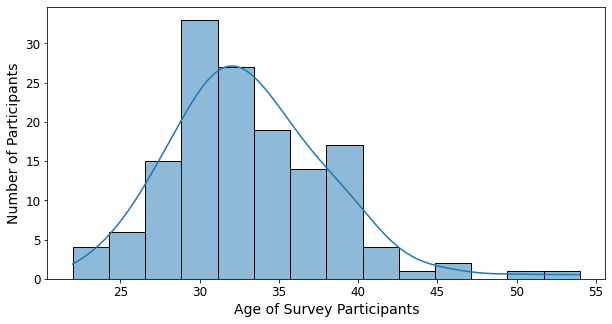

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',kde=True)
plt.xlabel("Age of Survey Participants",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Number of Participants",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

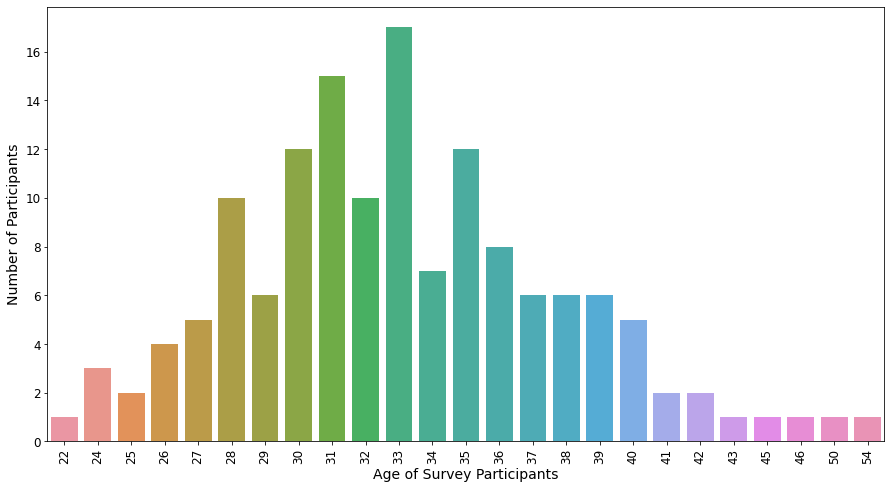

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Age')
plt.xticks(fontsize=12,rotation=90)
plt.xlabel("Age of Survey Participants",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Number of Participants",fontsize=14)
plt.show()

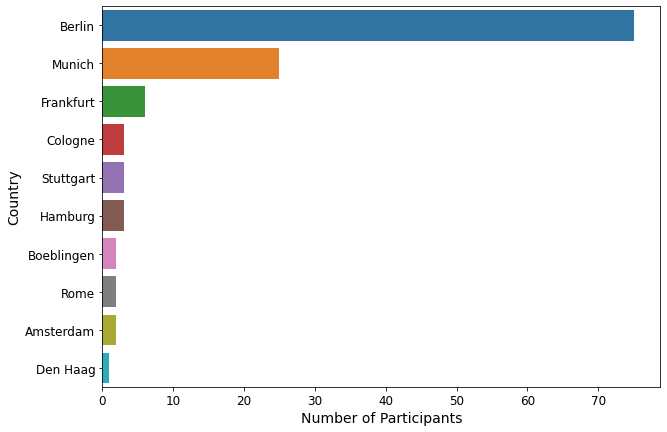

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df['City'].value_counts().head(10).reset_index(),y='index',x='City')
plt.xticks(fontsize=12)
plt.xlabel("Number of Participants",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Country",fontsize=14)
plt.show()

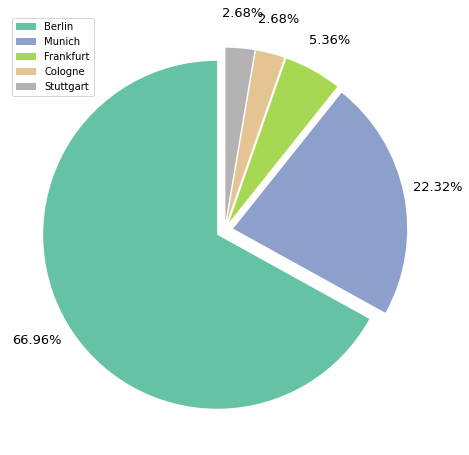

In [ ]:
plt.figure(figsize=(15,8))
df['City'].value_counts().iloc[:5].plot.pie(autopct="%1.2f%%",fontsize=13,startangle=90,labels=['']*5,cmap='Set2',explode=[0.05] * 5,pctdistance=1.2)
plt.ylabel("")
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:5].index)
plt.show()

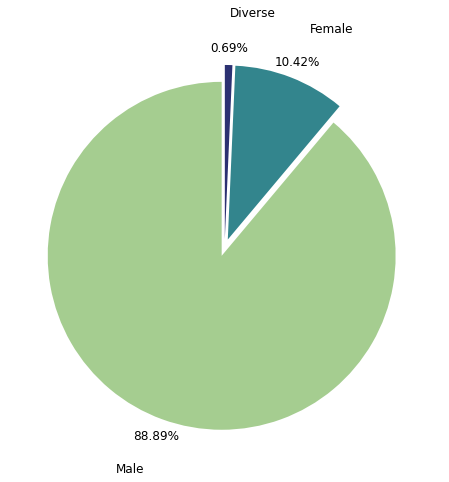

In [ ]:
plt.figure(figsize=(15,8))
df['Gender'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=12,startangle=90,
                                         cmap='crest',explode=[0.05] * 3,pctdistance=1.1,
                                          labeldistance=1.3,textprops={'fontsize': 15})
plt.ylabel("")
plt.show()

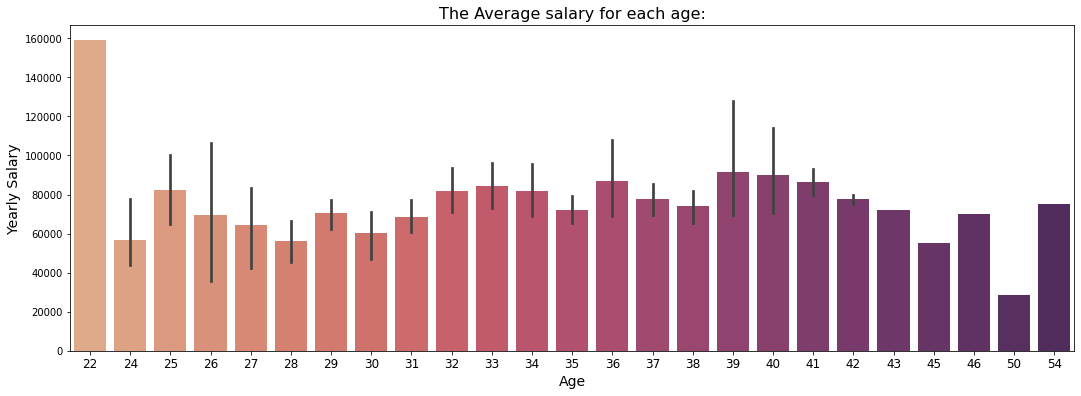

In [ ]:
# the Average salary for each age

age_salary = df.groupby('Age', as_index = False).median()
plt.figure(figsize=(18, 6))
sns.barplot(data= df, x= 'Age', y= 'Yearly salary',palette= 'flare')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

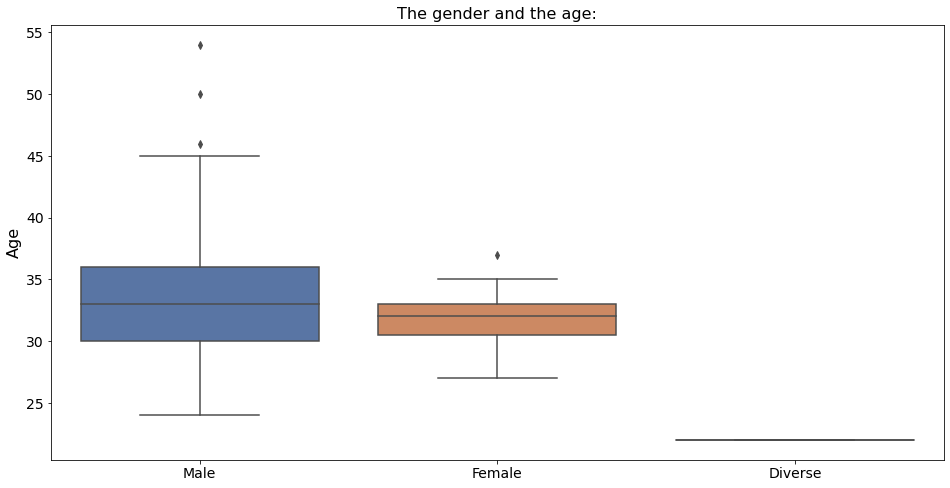

In [ ]:
# The gender and the age:

plt.figure(figsize=(16,8))
sns.boxplot(data= df, x= df['Gender'], y= df['Age'], palette= 'deep')
plt.title('The gender and the age:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Age', fontsize= 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

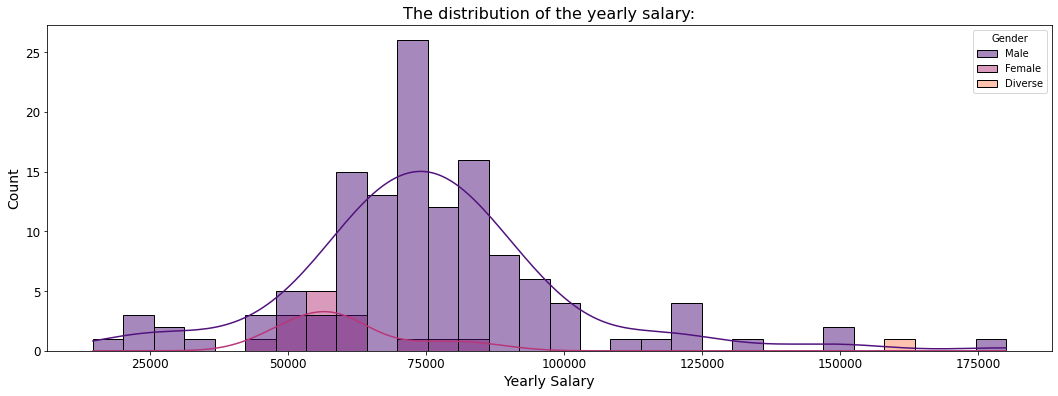

In [ ]:
# the distribution of yearly salary:

plt.figure(figsize=(18,6))
sns.histplot(data= df, x= df['Yearly salary'], hue= 'Gender', palette= 'magma', kde= True, bins = 30)
plt.title('The distribution of the yearly salary:',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

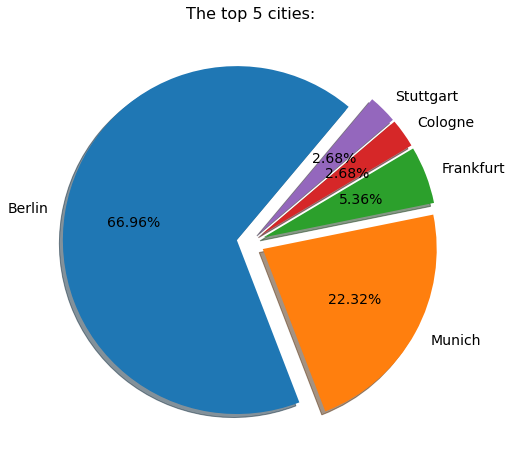

In [ ]:
# The cities of participants:

plt.figure(figsize= (18,8))
plt.pie(df['City'].value_counts().head(5), labels=df['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
        explode= [0.08]*5, shadow= True, startangle= 50, autopct= '%1.2F%%')
plt.title('The top 5 cities:', fontsize= 16)
plt.show()

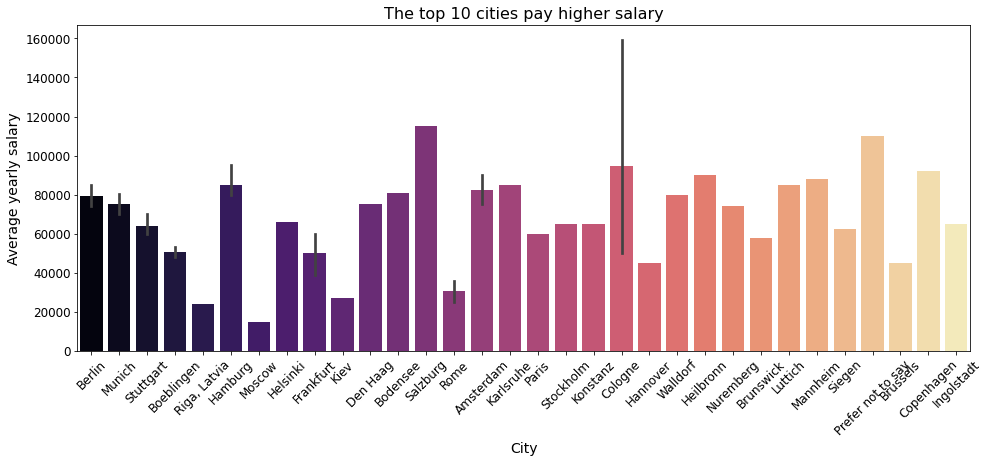

In [ ]:
# The top 10 cities pay the higher salary:

salary_city = df.groupby('City', as_index= False).mean().sort_values('Yearly salary', ascending = False) # sort cities according to the salary

# two values in top 10 are not cities so droped them:

#salary_city = salary_city.drop(index= [81, 15])
salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= df, x= 'City', y= 'Yearly salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)
#plt.bar_label(ax.containers[0], label_type = 'edge',fontsize = 12)
plt.show()

In [ ]:
#df['Seniority level'].value_counts()

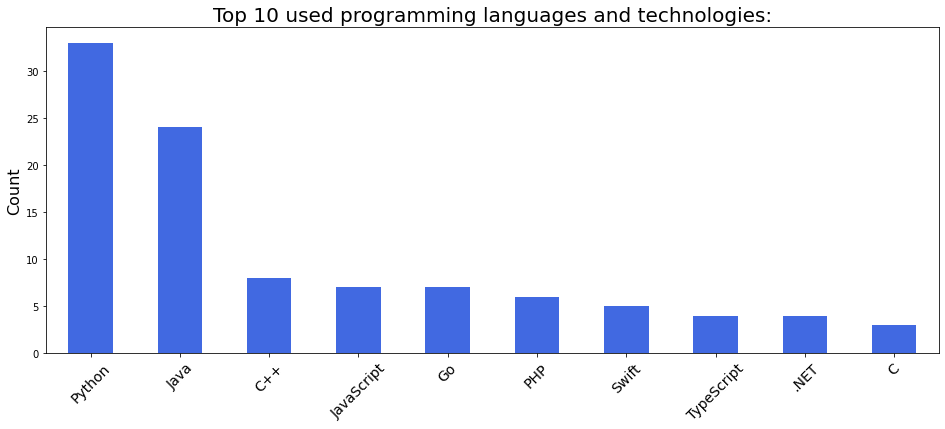

In [ ]:
# top 10 programming languages and technologies:

plt.figure(figsize=(16, 6))
ax = df['Main technology'].value_counts().head(10).plot(kind = 'bar', color = 'royalblue')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
#plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 16, rotation = 90, color = 'w')
plt.show()

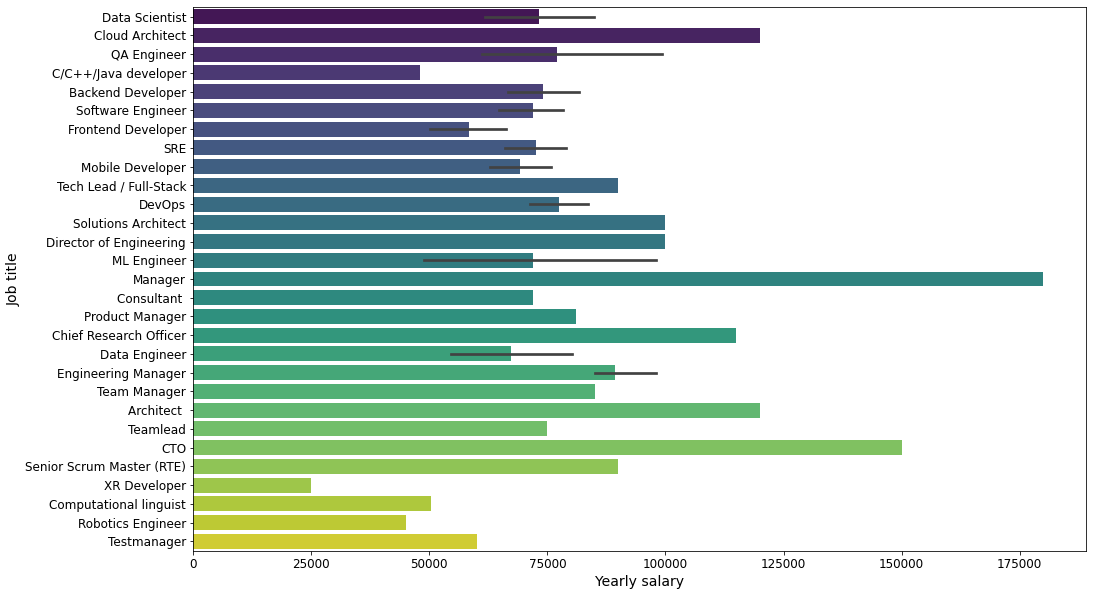

In [ ]:
# top 10 positons get the highest salaries

position = df.groupby('Position', as_index= False).median().sort_values('Yearly salary', ascending = False).head(15)

plt.figure(figsize= (16 , 10))
sns.barplot(data = df, y = 'Position', x = 'Yearly salary', palette = 'viridis')
plt.xlabel('Yearly salary', fontsize= 14)
plt.ylabel('Job title', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

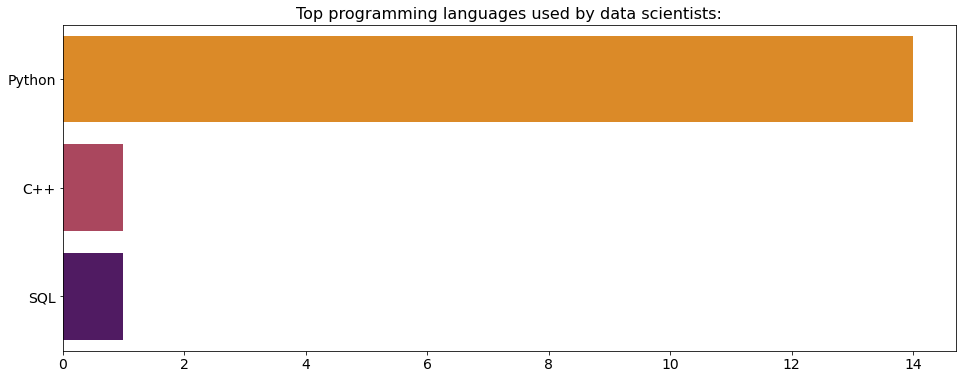

In [ ]:
# top programming languages and technologies used by data scientists:

ds = df.loc[df['Position'] == 'Data Scientist']

plt.figure(figsize= (16,6))
sns.barplot(x= ds['Main technology'].value_counts()[:3] , y= ds['Main technology'].value_counts()[:3].index, palette = 'inferno_r')
plt.title('Top programming languages used by data scientists:' ,fontsize = 16)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel('')
plt.show()

In [ ]:
# the distribution of the company types:

df['Company type'].value_counts()

Product                82
Startup                33
Consulting / Agency    16
Concern                 1
Utilities               1
service                 1
Telecommunications      1
Publisher               1
Retail                  1
Cloud                   1
Finance                 1
Old industry            1
Enterprise              1
Media                   1
E-commerce              1
IT-Outsourcing          1
Name: Company type, dtype: int64

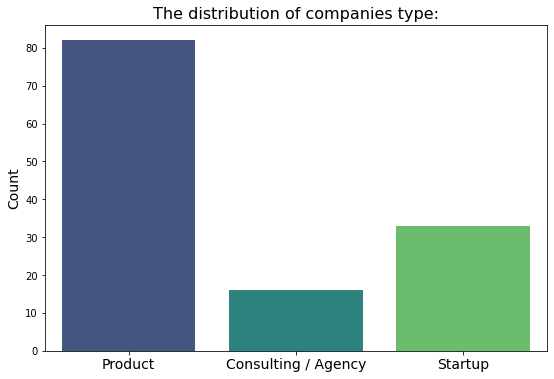

In [ ]:
# we noticed that there are three main company types so we will exclude the others:

company = df.loc[df['Company type'].isin(['Product', 'Startup', 'Consulting / Agency'])]

plt.figure(figsize= (9,6))
ax = sns.countplot(data = company, x = 'Company type', palette = 'viridis')
plt.title('The distribution of companies type:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

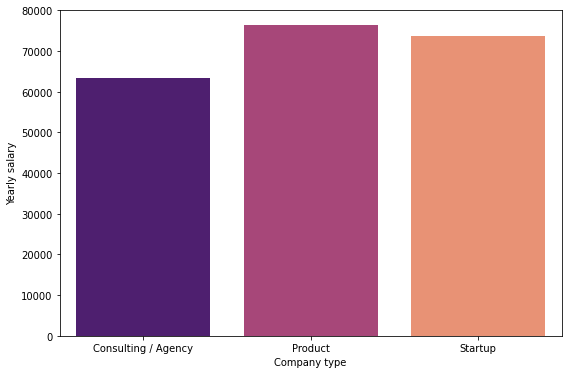

In [ ]:
# the relationship between the company type and the other features:

company_type = company.groupby('Company type', as_index= False).mean()

plt.figure(figsize= (9, 6))
sns.barplot(data = company_type, x= 'Company type', y = 'Yearly salary', palette= 'magma')
plt.show()

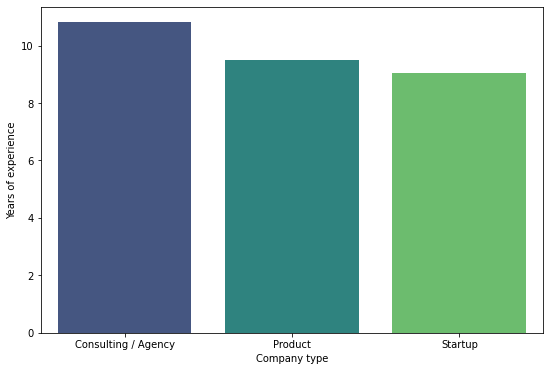

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data = company_type, x= 'Company type', y = 'Years of experience', palette = 'viridis')
plt.show()

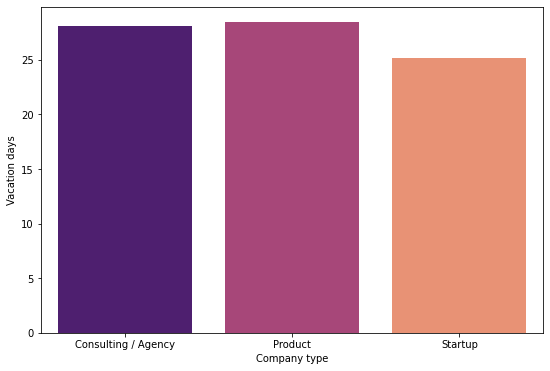

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data = company_type, x= 'Company type', y = 'Vacation days', palette = 'magma')
plt.show()

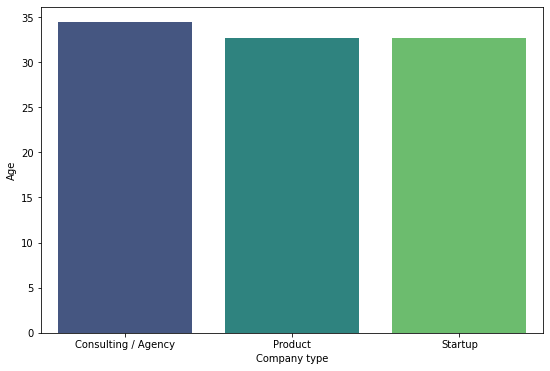

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data = company_type, x= 'Company type', y = 'Age', palette = 'viridis')
plt.show()

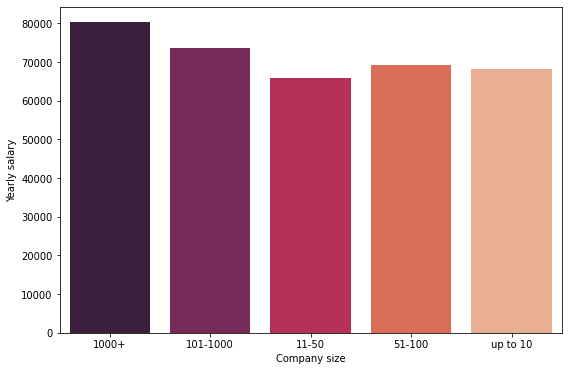

In [ ]:
company_size = df.groupby('Company size', as_index = False).mean()

plt.figure(figsize= (9, 6))
sns.barplot(data = company_size, x= 'Company size', y = 'Yearly salary', palette= 'rocket')
plt.show()

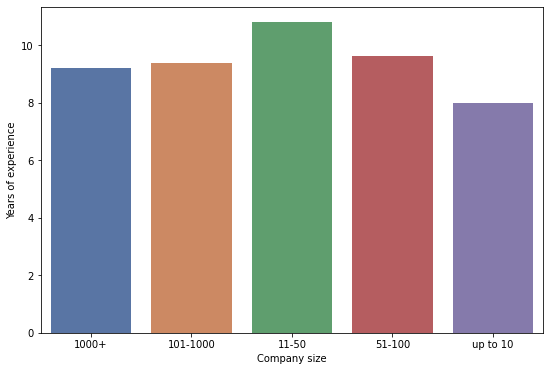

In [ ]:
plt.figure(figsize= (9, 6))
sns.barplot(data = company_size, x= 'Company size', y = 'Years of experience', palette = 'deep')
plt.show()

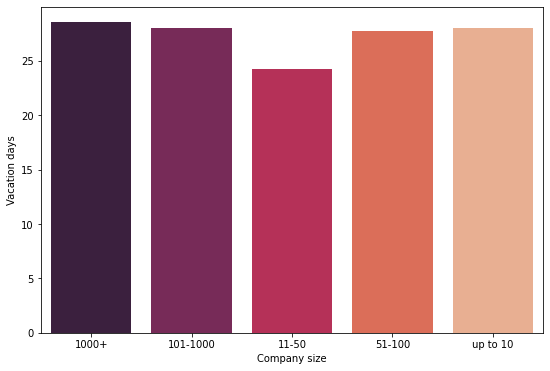

In [ ]:
plt.figure(figsize= (9, 6))
sns.barplot(data = company_size, x= 'Company size', y = 'Vacation days', palette = 'rocket')
plt.show()

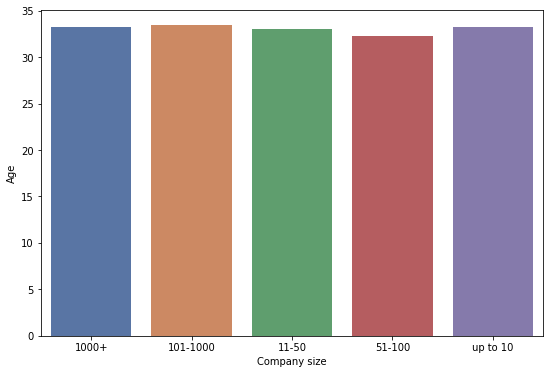

In [ ]:
plt.figure(figsize= (9, 6))
sns.barplot(data = company_size, x= 'Company size', y = 'Age', palette = 'deep')
plt.show()